In [139]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer

import numpy as np
import matplotlib.pyplot as plt

In [140]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("data_clean.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10-2014,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,3,7,7.073270,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,12-2014,13.195614,3,2.25,7.851661,8.887653,2.0,0,0,3,7,7.682482,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,02-2015,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,3,6,6.646391,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,12-2014,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,6.956545,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,02-2015,13.142166,3,2.00,7.426549,8.997147,1.0,0,0,3,8,7.426549,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [185]:
X = data.copy().drop(columns='price')
y = data['price'].copy()
x_train, x_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

params = {}

numerique = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']
catego = ['date','yr_built', 'yr_renovated', 'zipcode', 'condition','grade','waterfront','view', 'bathrooms', 'bedrooms']
minmax = ['bedrooms']

pip_1 = make_pipeline(MinMaxScaler())
pip_3 = make_pipeline(OneHotEncoder(sparse=True))
pip_2 = make_pipeline(RobustScaler())

transformer = make_column_transformer((pip_1, numerique), (pip_2, numerique),(pip_3, catego))
model = make_pipeline(transformer, LinearRegression())
grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(x_train, y_train)


C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 707, in score
  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['sqft_living',
                                                                          'sqft_lot',
                                                                          'sqft_above',
                                                                          'sqft_basement',
                                                                          'sqft_living15',
                                                                          'sqft_lot15',
                                                                          'lat',
    

In [186]:
y_pred = np.exp(grid.predict(x_test))
r2_score(np.exp(y_test),y_pred)

0.8926743149399508

In [187]:
cross = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
print(cross.mean())

C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    

nan


C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    

In [144]:
grid.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'linearregression', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__pipeline-1', 'columntransformer__pipeline-2', 'columntransformer__pipeline-1__memory', 'columntransformer__pipeline-1__steps', 'columntransformer__pipeline-1__verbose', 'columntransformer__pipeline-1__minmaxscaler', 'columntransformer__pipeline-1__minmaxscaler__clip', 'columntransformer__pipeline-1__minmaxscaler__copy', 'columntransformer__pipeline-1__minmaxscaler__feature_range', 'columntransformer__pipeline-2__memory', 'columntransformer__pipeline-2__steps', 'columntransformer__pipeline-2__verbose', 'columntransformer__pipeline-2__onehotencoder', 'columntransformer__pipeline-2__onehotencoder__categories', 'columntransformer__pipeline

In [145]:
X = data.copy().drop(columns='price')
y = data['price'].copy()
x_train, x_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)



numerique = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']
catego = ['date','yr_built', 'yr_renovated', 'zipcode', 'condition','grade','waterfront','view', 'bathrooms', 'bedrooms']

pip_1 = make_pipeline(MinMaxScaler())
pip_3 = make_pipeline(OneHotEncoder(sparse=True))

transformer = make_column_transformer((pip_1, numerique), (pip_3, catego))

model = make_pipeline(transformer, Ridge())
model.fit(x_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'lat',
                                                   'long']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['date', 'yr_built',
           

In [146]:
cross_val_score(model, x_test, y_test, cv=5)

C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda 

array([       nan,        nan, 0.87075229,        nan,        nan])

In [147]:
y_pred = np.exp(model.predict(x_test))
r2_score( np.exp(y_test),y_pred)

0.8927490567982779

In [181]:
X = data.copy().drop(columns='price')
y = data['price'].copy()
del X['date']
x_train, x_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



numerique = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']
catego = ['yr_built', 'yr_renovated', 'zipcode', 'condition','waterfront','view', 'bathrooms', 'bedrooms']

pip_1 = make_pipeline(MinMaxScaler())
pip_3 = make_pipeline(OneHotEncoder(sparse=True))

transformer = make_column_transformer((pip_1, numerique), (pip_3, catego))
model = make_pipeline(transformer, Lasso(alpha=0.000009))
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\Users\Apprenant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.868921245139859, tolerance: 0.4773410081180067
  model = cd_fast.sparse_enet_coordinate_descent(


0.881215036506473

In [167]:
y_pred = (model.predict(x_test))
r2_score((y_test),y_pred)

0.8801297938702777

In [6]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

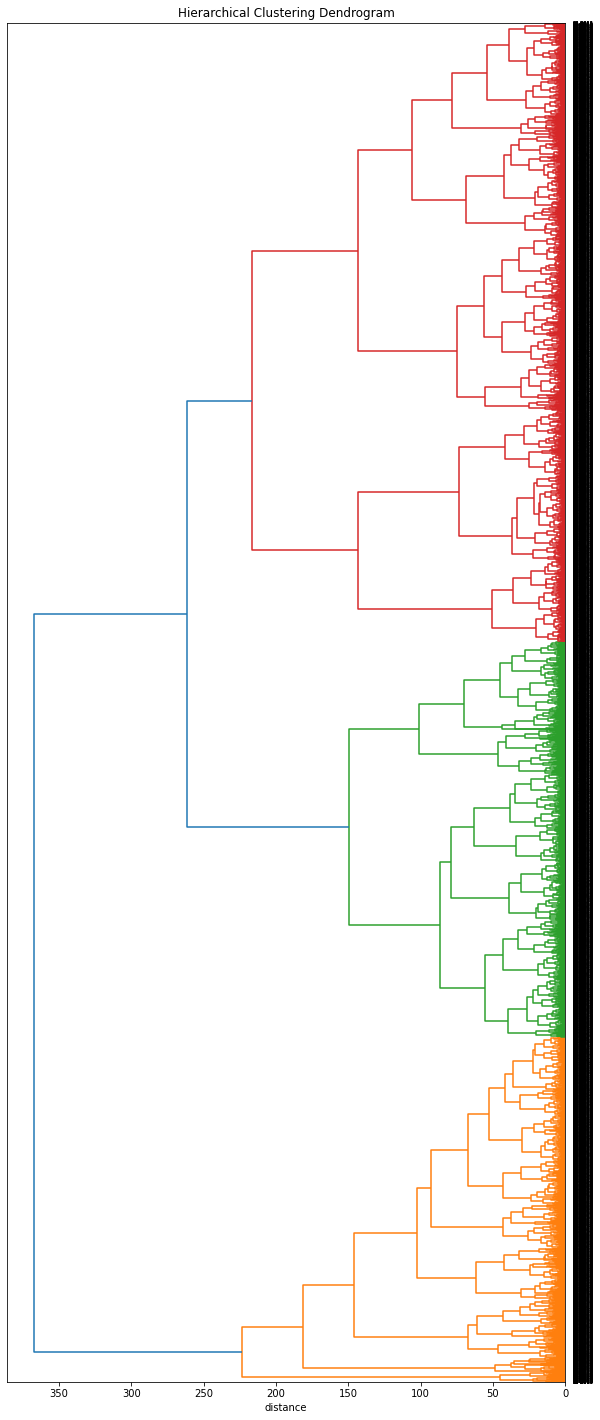

In [7]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('data_clean.csv', index_col = 0)


# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)